# Node-level Tasks and Features

## Node-level Tasks
### Overview
![Node-level Tasks](figures/02-tradition-ml_9.jpeg)
![Node-level Tasks](figures/02-tradition-ml_10.jpeg)

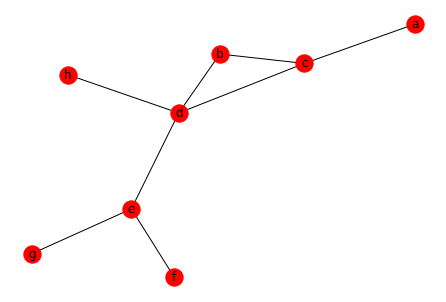

In [2]:
import string
import networkx as nx

alphabet = string.ascii_lowercase
G = nx.Graph()
G.add_nodes_from([l for l in alphabet[:8]])
G.add_edges_from([("a", "c"),
                  ("b", "c"),
                  ("b", "d"),
                  ("c", "d"),
                  ("d", "e"),
                  ("d", "h"),
                  ("e", "f"),
                  ("e", "g"),
                 ])
nx.draw(G, with_labels=True, node_color="r")

## Node-level Features
### Node Degree
![Node-level Tasks](figures/02-tradition-ml_11.jpeg)

In [21]:
for label in alphabet[:4]:
    print(f"node_degree['{label}'] = {G.degree[label]}")

node_degree['a'] = 1
node_degree['b'] = 2
node_degree['c'] = 3
node_degree['d'] = 3


### Node Centrality
![11](figures/02-tradition-ml_12.jpeg)

#### Eigenvector centrality
![12](figures/02-tradition-ml_13.jpeg)
![13](figures/02-tradition-ml_14.jpeg)

In [16]:
nx.eigenvector_centrality(G)

{'a': 0.19027974474368758,
 'b': 0.42424443757468244,
 'c': 0.4783911577530804,
 'd': 0.5882192744400797,
 'e': 0.34226351227678276,
 'f': 0.13613682815559253,
 'g': 0.13613682815559253,
 'h': 0.23396469283099508}

#### Betweeness Centrality
![14](figures/02-tradition-ml_15.jpeg)

In [20]:
G = nx.Graph()
G.add_nodes_from(["a", "b", "c", "d", "e"])
G.add_edges_from([("a", "c"),
                  ("b", "c"),
                  ("b", "d"),
                  ("c", "d"),
                  ("d", "e"),
                 ])
print(nx.betweenness_centrality(G, normalized=False))

{'a': 0.0, 'b': 0.0, 'c': 3.0, 'd': 3.0, 'e': 0.0}


#### Closeness Centrality
![14](figures/02-tradition-ml_16.jpeg)

`NetworkX` uses a normalized version of `closeness centrality`. For a node $u$ with $n-1$ reachable nodes, the closeness centrality is defined as
$$
 C(u) = \frac{n-1}{\sum_{v=1}^{n-1}d(v,u)}
$$
where $d(v,u)$ is the shortest path between $v$ and $u$.

For Node `a`, it has 4 reachable nodes, and the corresponding closeness centrality is

In [23]:
nx.closeness_centrality(G, u='a', wf_improved=False)

0.5

### Clustering Coefficient
![14](figures/02-tradition-ml_17.jpeg)

In [4]:
G_1 = nx.Graph()
G_1.add_nodes_from(["1", "2", "3", "4", "v"])
G_1.add_edges_from([("1", "2"),
                  ("1", "3"),
                  ("1", "4"),
                  ("2", "3"),
                  ("2", "4"),
                  ("3", "4"),
                  ("1", "v"),
                  ("2", "v"),
                  ("3", "v"),
                  ("4", "v")
                 ])

G_2 = nx.Graph()
G_2.add_nodes_from(["1", "2", "3", "4", "v"])
G_2.add_edges_from([("1", "2"),
                  ("2", "3"),
                  ("3", "4"),
                  ("1", "v"),
                  ("2", "v"),
                  ("3", "v"),
                  ("4", "v")
                 ])

G_3 = nx.Graph()
G_3.add_nodes_from(["1", "2", "3", "4", "v"])
G_3.add_edges_from([
                  ("1", "v"),
                  ("2", "v"),
                  ("3", "v"),
                  ("4", "v")
                 ])

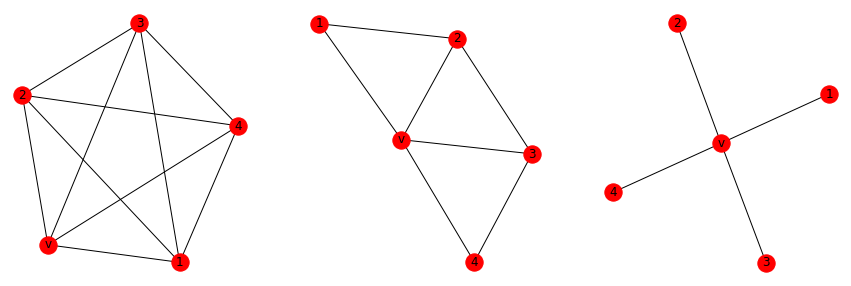

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize=(15,5))
nx.draw(G_1, ax=ax[0], with_labels=True, node_color="r")
nx.draw(G_2, ax=ax[1], with_labels=True, node_color="r")
nx.draw(G_3, ax=ax[2], with_labels=True, node_color="r")
plt.show()

In [23]:
for idx, g in enumerate([G_1, G_2, G_3]):
    print(f"Fig_{idx} - clustering coeffecient of $v$ = {nx.clustering(g, nodes=['v'])['v']}")

Fig_0 - clustering coeffecient of $v$ = 1.0
Fig_1 - clustering coeffecient of $v$ = 0.5
Fig_2 - clustering coeffecient of $v$ = 0


### Graphlets
![14](figures/02-tradition-ml_18.jpeg)

`NetworkX` can also count the number of `triangles`: 

In [26]:
G = nx.Graph()
G.add_nodes_from(["1", "2", "3", "4", "v"])
G.add_edges_from([("1", "2"),
                  ("2", "3"),
                  ("3", "4"),
                  ("1", "v"),
                  ("2", "v"),
                  ("3", "v"),
                  ("4", "v")
                 ])
print(f"# of triangles with `v` as a vertex = {nx.triangles(G, nodes=['v'])['v']}")

# of triangles with `v` as a vertex = 3


![](figures/02-tradition-ml_19.jpeg)
![](figures/02-tradition-ml_20.jpeg)
![](figures/02-tradition-ml_21.jpeg)

There is no API in `NetworkX` to direct extract and count the graphlets. Here we just used a brutal-force way to extract graphlet instances with a given number of nodes.

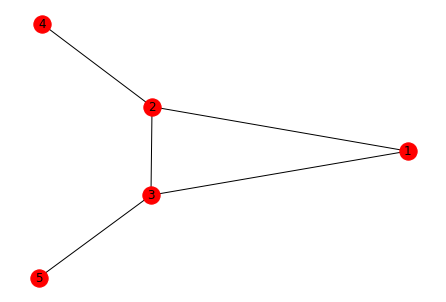

In [28]:
G = nx.Graph()
G.add_nodes_from(["1", "2", "3", "4", "5"])
G.add_edges_from([("1", "2"),
                  ("1", "3"),
                  ("2", "3"),
                  ("2", "4"),
                  ("3", "5")
                 ])
nx.draw(G, with_labels=True, node_color='r')

In [39]:
import itertools
n = 3
for sub_nodes in itertools.combinations(G.nodes(), 3):
    if "1" in sub_nodes:
        subg = G.subgraph(sub_nodes)
        if nx.is_connected(subg):
            print(subg.edges())

[('1', '2'), ('1', '3'), ('2', '3')]
[('1', '2'), ('2', '4')]
[('1', '3'), ('3', '5')]


![](figures/02-tradition-ml_22.jpeg)

## Summary
### Importance-based features
![](figures/02-tradition-ml_24.jpeg)

### Structure-based features
![](figures/02-tradition-ml_25.jpeg)